<a href="https://colab.research.google.com/github/vishalrk1/DIP-Assignments/blob/main/DIP_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Displaying Image

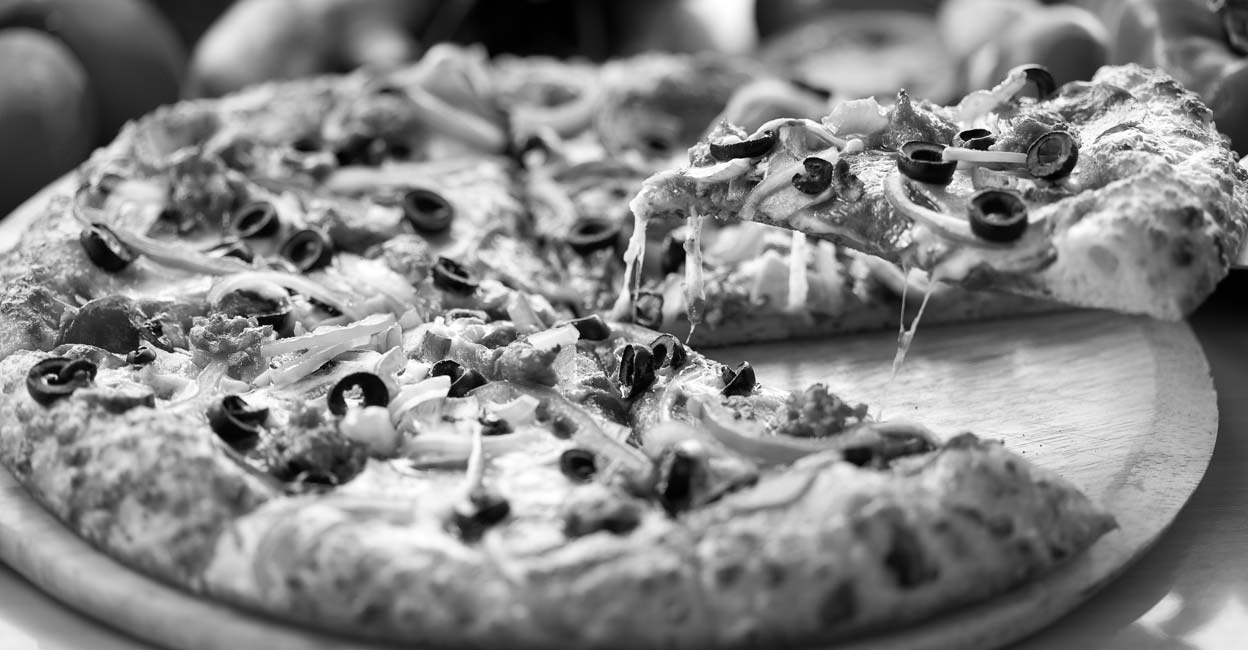

In [25]:
img = cv2.imread('/content/pizza.jpg', 0)
cv2_imshow(img)

# Converting pixel values into 8-bit values

In [26]:
lst = []

for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    lst.append(np.binary_repr(img[i][j], width=8))

In [27]:
lst[:10]

['01101101',
 '01101101',
 '01101101',
 '01101110',
 '01101110',
 '01101110',
 '01101111',
 '01101111',
 '01110001',
 '01110000']

# seperating bit plane images

In [48]:
# extracting bitplane and reshaping them
eight_bit_image = (np.array([int(i[0]) for i in lst], dtype=np.uint8) * 128).reshape(img.shape[0], img.shape[1])
seven_bit_image = (np.array([int(i[1]) for i in lst], dtype=np.uint8) * 64).reshape(img.shape[0], img.shape[1])
six_bit_image = (np.array([int(i[2]) for i in lst], dtype=np.uint8) * 32).reshape(img.shape[0], img.shape[1])
five_bit_image = (np.array([int(i[3]) for i in lst], dtype=np.uint8) * 16).reshape(img.shape[0], img.shape[1])
four_bit_image = (np.array([int(i[4]) for i in lst], dtype=np.uint8) * 8).reshape(img.shape[0], img.shape[1])
three_bit_image = (np.array([int(i[5]) for i in lst], dtype=np.uint8) * 4).reshape(img.shape[0], img.shape[1])
two_bit_image = (np.array([int(i[6]) for i in lst], dtype=np.uint8) * 2).reshape(img.shape[0], img.shape[1])
one_bit_image = (np.array([int(i[7]) for i in lst], dtype=np.uint8) * 128).reshape(img.shape[0], img.shape[1])

# Function to plot all bit plane images

In [56]:
def display_images(n=8):
  # Setup plot
  plt.figure(figsize=(12, 5), dpi=150)

  # Loop through samples and display
  for i in range(8):
    bit_image = (np.array([int(j[i]) for j in lst], dtype=np.uint8) * (2**i)).reshape(img.shape[0], img.shape[1])
    # print(sample_adjust)
    bit_image = cv2.normalize(bit_image, np.zeros(img.shape), 0, 255, cv2.NORM_MINMAX)
    # Plot adjusted samples
    plt.subplot(3, 3, i+1)
    plt.imshow(bit_image, cmap='gray')
    plt.axis("off")
    plt.title(f"{8-i} bit plane")

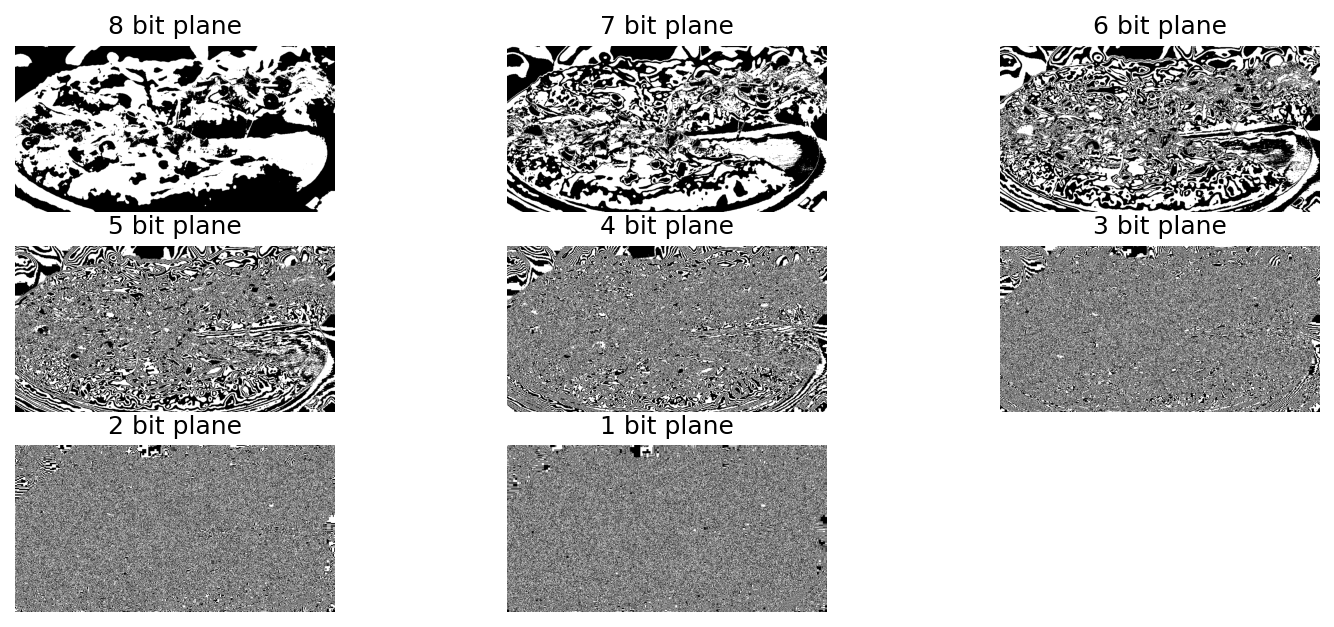

In [57]:
display_images()

# Extracting maximum information from image

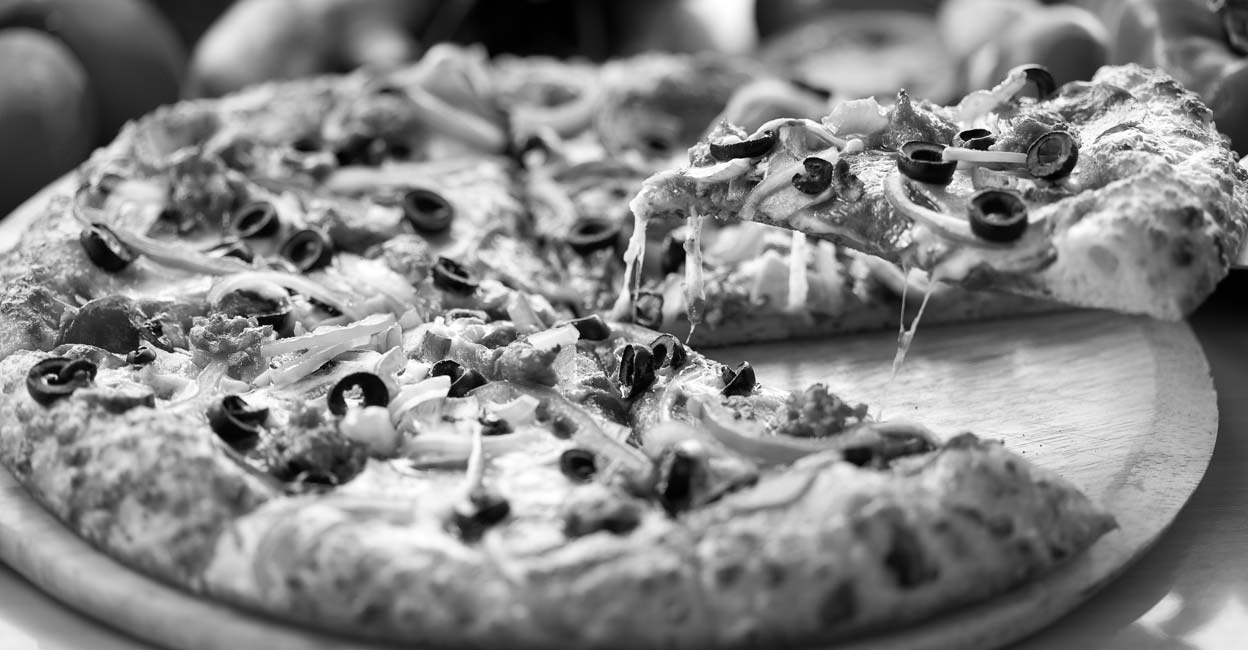

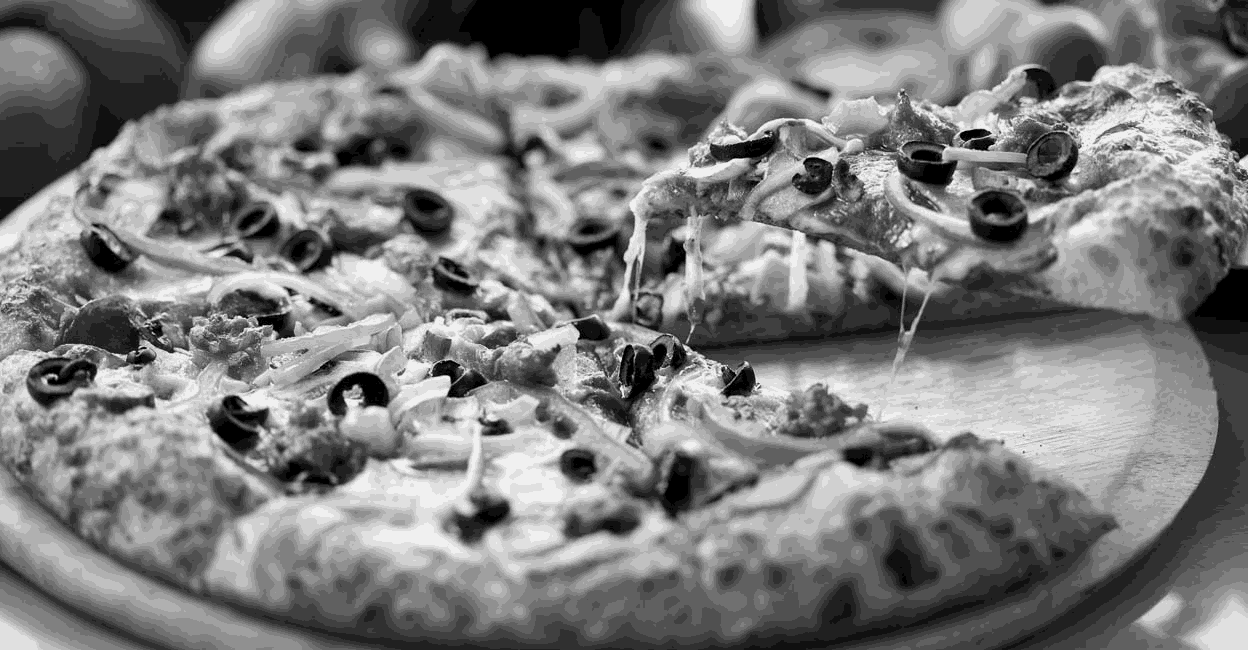

-1

In [53]:
new_img = eight_bit_image + seven_bit_image + six_bit_image + five_bit_image

cv2_imshow(img)
cv2_imshow(new_img)
cv2.waitKey(0)